# Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=3,suppress=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Przygotowanie danych do uczenia

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']

In [4]:
raw_dataset = pd.read_csv(url,names=column_names,na_values='?', comment='\t', sep=' ',skipinitialspace=True)

In [5]:
dataset = raw_dataset.copy()
dataset.tail(8)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
dataset.isna().sum()

MPG 0
Cylinders 0
Displacement 0
Horsepower 6
Weight 0
Acceleration 0
Model Year 0
Origin 0
dtype: int64

In [7]:
dataset = dataset.dropna()

In [8]:
dataset.isna().sum()

MPG 0
Cylinders 0
Displacement 0
Horsepower 0
Weight 0
Acceleration 0
Model Year 0
Origin 0
dtype: int64

In [9]:
dataset['Origin'] = dataset['Origin'].map({1:'USA',2:'Europe',3:'Japan'})

In [10]:
dataset = pd.get_dummies(dataset,columns=['Origin'],prefix='',prefix_sep='')
dataset.tail(4)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [11]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

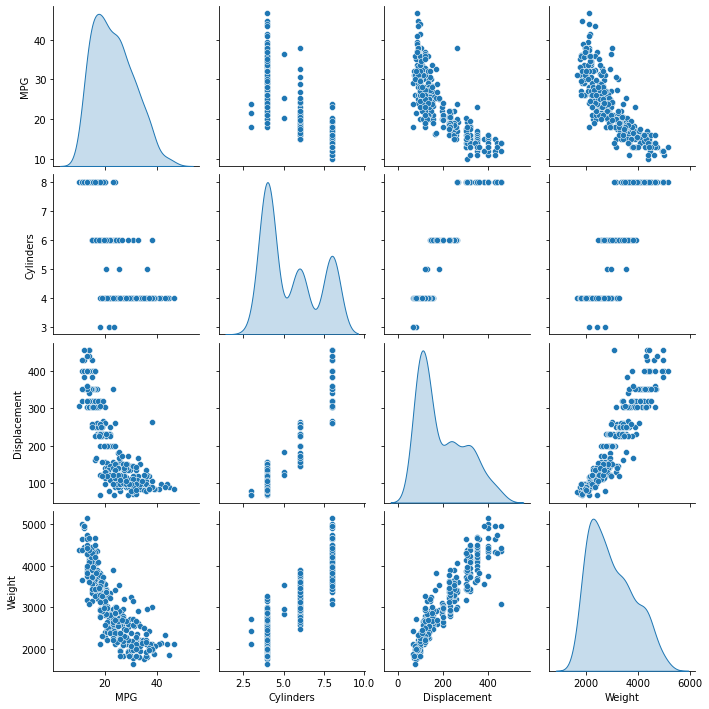

In [12]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Weight']],diag_kind='kde')

In [13]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [14]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [15]:
train_dataset.describe().transpose()[['mean','std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [16]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [17]:
normalizer.adapt(np.array(train_features))

In [18]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [19]:
first = np.array(train_dataset[:1])

# Remove the 'MPG' column
first_features = np.delete(first, 0, axis=1)

with np.printoptions(precision=2,suppress=True):
    print(f'pierwszy przypadek: {first_features}')
    print(f'po normalizacji: {normalizer(first_features).numpy()}')

pierwszy przypadek: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]
po normalizacji: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


# Regresja liniowa z jedną zmienną

In [20]:
horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = layers.Normalization(input_shape=[1,],axis=None)
horsepower_normalizer.adapt(horsepower)

In [21]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])
horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [23]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 104ms/step


array([[-1.092],
 [-0.617],
 [ 2.016],
 [-1.531],
 [-1.385],
 [-0.544],
 [-1.641],
 [-1.385],
 [-0.361],
 [-0.617]], dtype=float32)

In [24]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [25]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 4.21 s, sys: 123 ms, total: 4.34 s
Wall time: 4.15 s


In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,val_loss,epoch
90,3.807685,4.171268,90
91,3.803474,4.171306,91
92,3.804836,4.186176,92
93,3.803440,4.203543,93
94,3.802517,4.193532,94
95,3.804619,4.179862,95
96,3.803977,4.200719,96
97,3.803468,4.195796,97
98,3.803645,4.183389,98
99,3.803862,4.199332,99


In [27]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'],label='train_loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

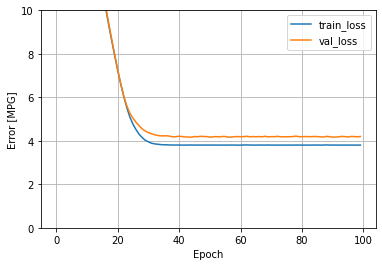

In [28]:
plot_loss(history)

In [29]:
test_result = {}
test_result['hrosepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels,
    verbose=0
)

In [30]:
x = tf.linspace(0.0,250,251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 1ms/step


In [31]:
def plot_horsepower(x,y):
    plt.scatter(train_features['Horsepower'],train_labels,label='Dane')
    plt.plot(x,y,color='k',label='krzywa regresji')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

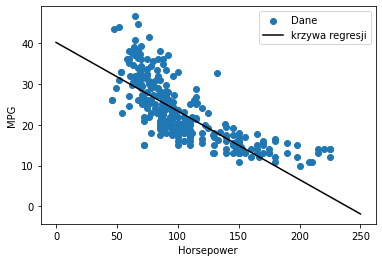

In [32]:
plot_horsepower(x,y)

# Regresja liniowa z wieloma danymi wejściowymi

In [33]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


In [34]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [35]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 4.15 s, sys: 161 ms, total: 4.31 s
Wall time: 4.02 s


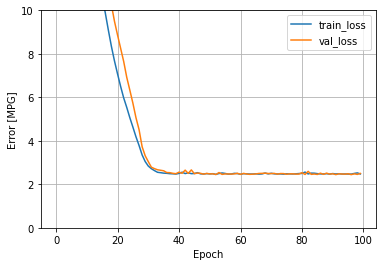

In [36]:
plot_loss(history)

In [37]:
test_result['linear_model'] = linear_model.evaluate(
    test_features,
    test_labels,
    verbose=0
)

# Regresja liniowa z głęboką siecią neuronową (DNN)

In [39]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(1)
    ])
    model.compile(
        loss='mean_absolute_error',
        optimizer = tf.keras.optimizers.Adam(0.001)
    )
    return model

# Regresja z użyciem DNN i pojedynczego wejścia

In [41]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)
dnn_horsepower_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 64)                128       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [42]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 4.17 s, sys: 226 ms, total: 4.4 s
Wall time: 4.11 s


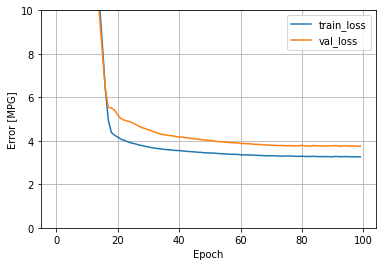

In [43]:
plot_loss(history)

In [44]:
test_result['dnn_hrosepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels,
    verbose=0
)

In [45]:
x = tf.linspace(0.0,255,251)
y = dnn_horsepower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


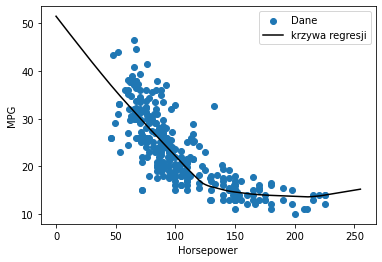

In [46]:
plot_horsepower(x,y)

# Regresja przy użuciu DNN i wielu danych wejściowych

In [47]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_8 (Dense)             (None, 64)                640       
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [48]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 4.41 s, sys: 172 ms, total: 4.58 s
Wall time: 4.26 s


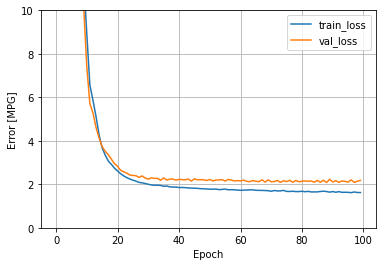

In [49]:
plot_loss(history)

In [50]:
test_result['dnn_model'] = dnn_model.evaluate(
    test_features,
    test_labels,
    verbose=0
)

# Wielowarstwowa Siec DNN z wieloma danymi wejściowymi

In [52]:
def build_and_compile_multilayers_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(1024,activation='relu'),
        layers.Dense(1)
    ])
    model.compile(
        loss='mean_absolute_error',
        optimizer = tf.keras.optimizers.Adam(0.001)
    )
    return model

In [54]:
dnn_multi_model = build_and_compile_multilayers_model(normalizer)
dnn_multi_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_19 (Dense)            (None, 64)                640       
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 128)               8320      
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 512)               66048     
                                                      

In [55]:
%%time
history = dnn_multi_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 13.6 s, sys: 778 ms, total: 14.3 s
Wall time: 9.81 s


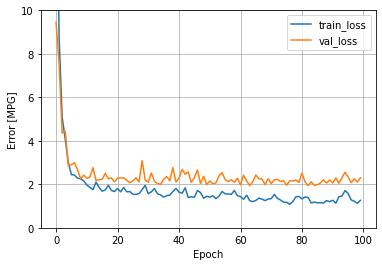

In [56]:
plot_loss(history)

In [57]:
test_result['dnn_multi_model'] = dnn_multi_model.evaluate(
    test_features,
    test_labels,
    verbose=0
)

# Prównanie wyników ewaluacyjnych dla poszczególnych sieci

In [58]:
pd.DataFrame(test_result,index=['Mean_absolute_error[MPG]']).T

,Mean_absolute_error[MPG]
hrosepower_model,3.651026
linear_model,2.542851
dnn_hrosepower_model,2.934017
dnn_model,1.672780
dnn_multi_model,1.922660
